## Observations and Insights

- 49.8% female mice and 50.2% male mice were used in this treatment study.

- One outlier is found for Infubinol treatment for mouse id c326 for tumor volume of 36.321346 (mm3).

- For Capomulin treatment, tumor volume reduced in size after it increased its size for few days over time .

- Mouse weight and tumor volume have very strong positive correlation with each other with a correaltion coefficient of 0.84.

## Dependencies and starter code

In [4]:
#%matplotlib notebook

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import sem
# Study data files


mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = study_results.merge(mouse_metadata, on = 'Mouse ID', how = 'left')

mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

#Grouping by 'Drug Regimen'
mouse_study_drug_groups = mouse_study.groupby('Drug Regimen')

#Mean of the Tumor Volume for each drug regimen
mean_mouse_drug = mouse_study_drug_groups['Tumor Volume (mm3)'].mean()

#Median of the Tumor Volume for each drug regimen
median_mouse_drug = mouse_study_drug_groups['Tumor Volume (mm3)'].median()

#Varaince of the Tumor Volume for each drug regimen
variance_mouse_drug = mouse_study_drug_groups['Tumor Volume (mm3)'].var()

#Standard Deviation of the Tumor Volume for each drug regimen
std_mouse_drug = mouse_study_drug_groups['Tumor Volume (mm3)'].std()

#SEMs of the Tumor Volume for each drug regimen
sems_mouse_drug = mouse_study_drug_groups['Tumor Volume (mm3)'].sem()

#Forming a DataFrame
statistic_table_tumor_volume = pd.DataFrame({'mean':mean_mouse_drug,'median':median_mouse_drug,
                                            'variance':variance_mouse_drug,'Std':std_mouse_drug,
                                            'SEMs':sems_mouse_drug})
statistic_table_tumor_volume

,mean,median,variance,Std,SEMs
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

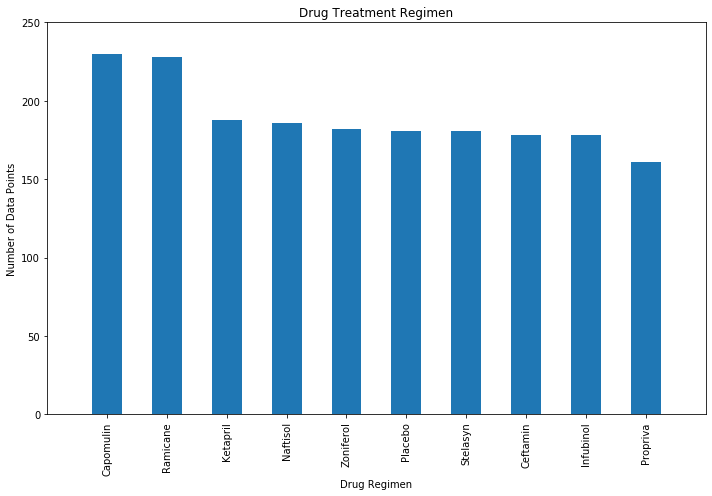

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Assigning figsize for axis 'ax1' in fig1
fig1, ax1 = plt.subplots(figsize = (10,7))

#calculating number of data points for each drug
drug_data_count = mouse_study['Drug Regimen'].value_counts()

#Bar plot using drug_data_count using pandas
ax1 = drug_data_count.plot(kind = 'bar',width = 0.5)

#setting the labels and Title
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Number of Data Points")
ax1.set_title("Drug Treatment Regimen")

#setting the limit
ax1.set_xlim(-1,10)
ax1.set_ylim(0,250)
plt.tight_layout()

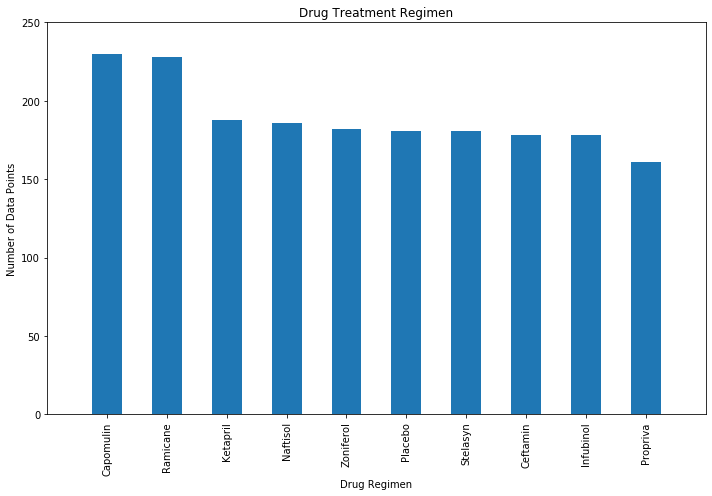

In [23]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Assigning figsize for fig1
fig2= plt.subplots(figsize= (10,7))

#extracting just the 'Drug Regimen'
drugs = mouse_study['Drug Regimen']

#Getting the number of data points for each drug
drug_counts = drugs.value_counts()

#converting to a dataframe
df_drugs = pd.DataFrame(drug_counts)

#finding the index for the x-ticks
index = df_drugs.index

#defining x_axis and y_axis
x_axis = range(len(index))
y_axis = df_drugs['Drug Regimen']

#assigning the x_ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, index, rotation = 90)

# Bar plot using our x_axis and y_axis in matplotlib pyplot
plt.bar(x_axis,y_axis, width = 0.5)

#setting limits
plt.xlim(-1,10)
plt.ylim(0,250)

#assiging labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title("Drug Treatment Regimen")

plt.tight_layout()

## Pie plots

In [ ]:
#Finding the number of male and female mice and forming a DataFrame
female_mouse = mouse_study[mouse_study['Sex']=='Female']
female_mouse_count = female_mouse['Mouse ID'].nunique()
male_mouse = mouse_study[mouse_study['Sex']=='Male']
male_mouse_count = male_mouse['Mouse ID'].nunique()
mouse_gender_data = {'Sex': ['male', 'female'],
        'count': [male_mouse_count,female_mouse_count]}
mouse_gender_count = pd.DataFrame(mouse_gender_data)

#labels for the pie plot
labels = mouse_gender_count['Sex']

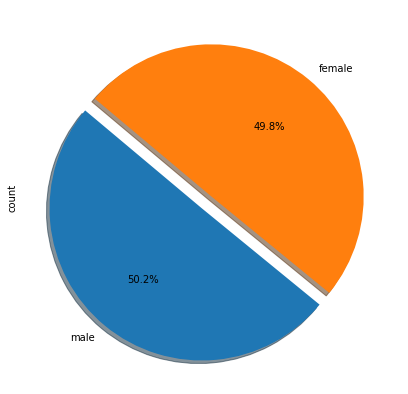

In [77]:
#pie plot for moouse gender data
mouse_gender_count.plot(y='count',kind = 'pie', labels = labels,legend = False,autopct="%1.1f%%",startangle=140,explode = (0.1, 0),figsize = (10,7),shadow=True)

([<matplotlib.patches.Wedge at 0x186224fef08>,
 [Text(-0.7655308193487089, -0.9241009493704109, 'male'),
  Text(0.7017365844029833, 0.8470925369228766, 'female')],
 [Text(-0.44655964462008013, -0.5390588871327396, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

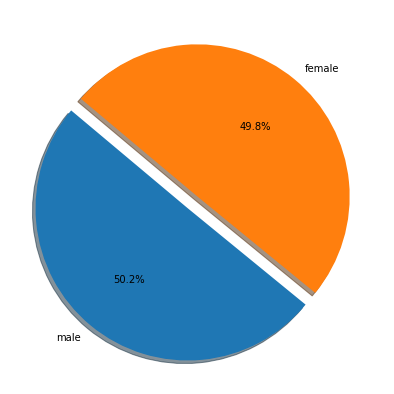

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig3= plt.subplots(figsize = (10,7))

#pie plot using matplotlib pyplot 
plt.pie(mouse_gender_data['count'],labels = labels, autopct="%1.1f%%",shadow=True, startangle=140,explode = (0.1, 0))

## Quartiles, outliers and boxplots

In [129]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine 
#if there are any potential outliers across all four treatment regimens.


In [168]:
#extracting the dataframe only for the drug = Capomulin
drug_capomulin = mouse_study[mouse_study['Drug Regimen'] == 'Capomulin']

#finding the final tuomor voume for the drug capomilin
tumor_volume_cap =drug_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
#finding the quartiles for capomulin treatment
quartiles_cap = tumor_volume_cap.quantile([0.25,0.5,0.75])

#lower quartile for capomulin treatment
lowerq_cap = quartiles_cap[0.25]

#upper quartile for capomulin treatment
upperq_cap = quartiles_cap[0.75]

#inter quartile range for capomulin treatment
iqr_cap = upperq_cap - lowerq_cap

#finding lower bound and upper bound for capomulin treatment
lower_bound_cap = lowerq_cap - 1.5 * iqr_cap
upper_bound_cap = upperq_cap + 1.5 * iqr_cap

print(f"Tumor volume below {lower_bound_cap} mm3 could be outliers for Capomulin treatment.")
print(f"Tumor volume above {upper_bound_cap} mm3 could be outliers for Capomuloin treatment.")

#finding out outliers for capomulin treatment
outliers_cap = tumor_volume_cap[(tumor_volume_cap < lower_bound_cap) | (tumor_volume_cap > upper_bound_cap)]

print(f"Outliers for Capomulin : {outliers_cap}")
print("--------------------------------------------------------------")

#extracting the dataframe only for the drug = Ramicane
drug_ramicane = mouse_study[mouse_study['Drug Regimen'] == 'Ramicane']

#finding the final tuomor voume for the drug Ramicane
tumor_volume_ram =drug_ramicane.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

##finding the quartiles for Ramicane treatment
quartiles_ram = tumor_volume_ram.quantile([0.25,0.5,0.75])

#lower quartile for Ramicane treatment
lowerq_ram = quartiles_ram[0.25]

#upper quartile for Ramicane treatment
upperq_ram = quartiles_ram[0.75]

#inter quartile range for Ramicane treatment
iqr_ram = upperq_ram - lowerq_ram

#finding lower bound and upper bound for Ramicane treatment
lower_bound_ram = lowerq_ram - 1.5 * iqr_ram
upper_bound_ram = upperq_ram + 1.5 * iqr_ram

print(f"Tumor volume below {lower_bound_ram} mm3 could be outliers for Ramicane treatment.")
print(f"Tumor volume above {upper_bound_ram} mm3 could be outliers for Ramicane treatment.")

#finding out outliers for Ramicane treatment
outliers_ram = tumor_volume_ram[(tumor_volume_ram < lower_bound_ram) | (tumor_volume_ram > upper_bound_ram)]
print(f"Outliers for Ramicane : {outliers_ram}")
print("--------------------------------------------------------------")

#extracting the dataframe only for the drug = Infubinol
drug_infubinol = mouse_study[mouse_study['Drug Regimen'] == 'Infubinol']

#finding the final tuomor voume for the drug Infubinol
tumor_volume_inf =drug_infubinol.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

#finding the quartiles for Infubinol treatment
quartiles_inf = tumor_volume_inf.quantile([0.25,0.5,0.75])

#lower quartile for infubinol treatment
lowerq_inf = quartiles_inf[0.25]

#upper quartile for infubinol treatment
upperq_inf = quartiles_inf[0.75]

#inter quartile range for infubinol treatment 
iqr_inf = upperq_inf - lowerq_inf

#finding lower bound and upper bound for infubinol treatment
lower_bound_inf = lowerq_inf - 1.5 * iqr_inf
upper_bound_inf = upperq_inf + 1.5 * iqr_inf

print(f"Tumor volume below {lower_bound_inf} mm3 could be outliers for Infubinol treatment.")
print(f"Tumor volume above {upper_bound_inf} mm3 could be outliers for Infubinol treatment.")

#finding out outliers for Infubinol treatment
outliers_inf = tumor_volume_inf[(tumor_volume_inf < lower_bound_inf) | (tumor_volume_inf > upper_bound_inf)]
print(f"Outliers for Infubinol : {outliers_inf}")
print("--------------------------------------------------------------")

#extracting the dataframe only for the drug = Ceftamin
drug_ceftamin = mouse_study[mouse_study['Drug Regimen'] == 'Ceftamin']

#finding the final tuomor voume for the drug Ceftamin
tumor_volume_cef =drug_ceftamin.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

#finding the quartiles for infubinol treatment
quartiles_cef = tumor_volume_cef.quantile([0.25,0.5,0.75])

#lower quartile for infubinol treatment
lowerq_cef = quartiles_cef[0.25]

#upper quartile for infubinol treatment
upperq_cef = quartiles_cef[0.75]

#inter quartile range for infubinol treatment
iqr_cef = upperq_cef - lowerq_cef

#finding the lower and upper bound for infubinol treatment
lower_bound_cef = lowerq_cef - 1.5 * iqr_cef
upper_bound_cef = upperq_cef + 1.5 * iqr_cef

print(f"Tumor volume below {lower_bound_cef} mm3 could be outliers for Ceftamin treatment.")
print(f"Tumor volume above {upper_bound_cef} mm3 could be outliers for Ceftamin treatment.")

#finding out outliers for ceftamin treatment
outliers_cef = tumor_volume_cef[(tumor_volume_cef < lower_bound_cef) | (tumor_volume_cef > upper_bound_cef)]
print(f"Outliers for Ceftamin : {outliers_cef}")
print("--------------------------------------------------------------")



Tumor volume below 20.70456164999999 mm3 could be outliers for Capomulin treatment.
Tumor volume above 51.83201549 mm3 could be outliers for Capomuloin treatment.
Outliers for Capomulin : Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------------------------
Tumor volume below 17.912664470000003 mm3 could be outliers for Ramicane treatment.
Tumor volume above 54.30681135 mm3 could be outliers for Ramicane treatment.
Outliers for Ramicane : Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------------------------
Tumor volume below 36.83290494999999 mm3 could be outliers for Infubinol treatment.
Tumor volume above 82.74144559000001 mm3 could be outliers for Infubinol treatment.
Outliers for Infubinol : Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------------------------------------------------
Tumor volume below 25.355449580000002 mm3 could be outliers for Ceftami

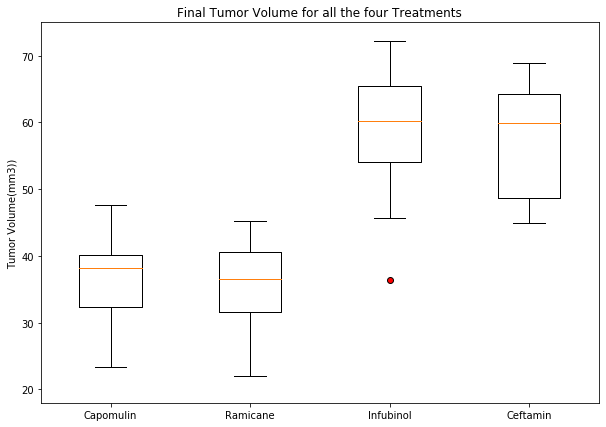

In [170]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Assigning figsize for ax1 in fig5
fig4, ax1 = plt.subplots(figsize =(10,7))

#list of all the final tumor volume for all the four drug regimens
data = [tumor_volume_cap,tumor_volume_ram,tumor_volume_inf,tumor_volume_cef]

#defining styling details for the outlier
red_circle = dict(markerfacecolor='r', marker='o')

#setting title and ylabel
ax1.set_title('Final Tumor Volume for all the four Treatments')
ax1.set_ylabel('Tumor Volume(mm3))')
ax1.set_ylim(18,75)

#boxplot using the list of final tumor volumes for all the four drug regimen
ax1.boxplot(data,labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=red_circle)
plt.show()

## Line and scatter plots

(39.5, 49)

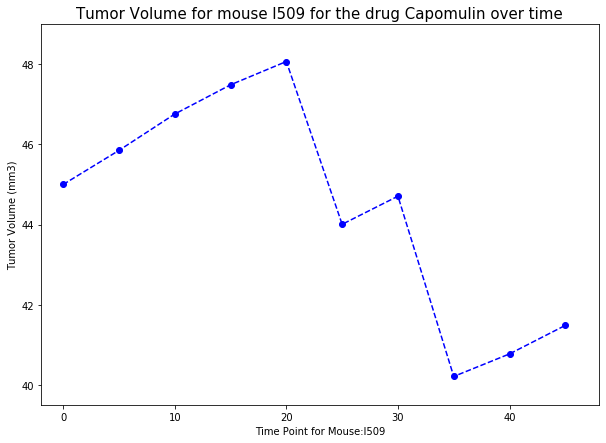

In [179]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

fig5 = plt.subplots(figsize = (10,7))
#extracting dataframe only for the drug = Capomulin
drug_cap = mouse_study[mouse_study['Drug Regimen'] == 'Capomulin']

#Only for one mouse, here we took mouse l509
mouse_id = 'l509'

#extracting data for our mouse id
mouse_509_data = drug_cap[drug_cap['Mouse ID'] == mouse_id]

#only taking the Timepoint for our mouseid 
time_point_mouse = mouse_509_data['Timepoint']

#Tumor volume (mm3) for our mouseid
tumor_volume_mouse = mouse_509_data['Tumor Volume (mm3)']

#lineplot for timepoint vs tumor volume for our mouseid
plt.plot(time_point_mouse,tumor_volume_mouse,marker ='o',c='b',linestyle='dashed',alpha = 1)

#Assigning labels and titles
plt.xlabel(f"Time Point for Mouse:{mouse_id}")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume for mouse {mouse_id} for the drug Capomulin over time",fontsize = 15)
plt.xlim(-2,48) 
plt.ylim(39.5,49)

Text(0.5, 1.0, 'Mouse weight Vs Average Tumor Volume (mm3) for Capomulin treatment')

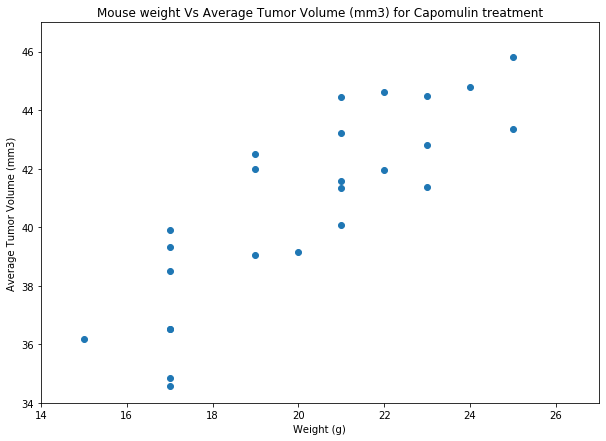

In [183]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Fig6 = plt.subplots(figsize=(10,7))

#Extracting for the drug Capomulin
mouse_drug_cap= mouse_study[mouse_study['Drug Regimen'] == 'Capomulin']

#Getting weight of the mice 
mouse_weight_cap = mouse_drug_cap.groupby('Mouse ID')['Weight (g)'].first()

#Getting the average tumor volume for those mice
mouse_tumor_vol_mean = mouse_drug_cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#plotting the scatter plot for mouse weight vs tumor volume for capomulin
plt.scatter(mouse_weight_cap,mouse_tumor_vol_mean)

#assigning labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(14,27)
plt.ylim(34,47)
plt.title('Mouse weight Vs Average Tumor Volume (mm3) for Capomulin treatment')

The correlation between mouse weight and average tumor volume is 0.84


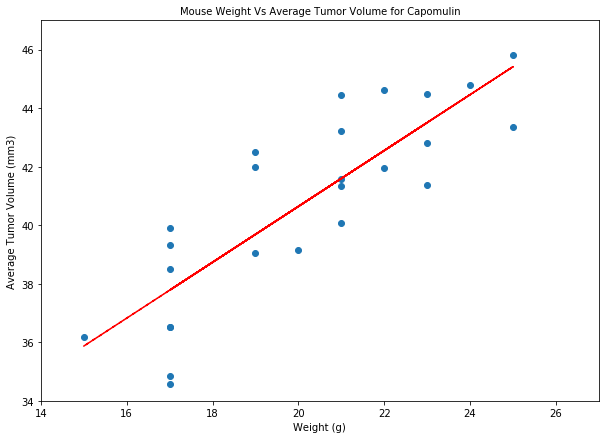

In [184]:


#finding all the values linregress study returns on mouse weight and tumor volume for capomulin
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(mouse_weight_cap,mouse_tumor_vol_mean)

#finding the regression line using slope and intercept
tv_fit = mouse_weight_cap *slope + intercept

#finding the correlation coefficient 
correlation = stats.pearsonr(mouse_weight_cap,mouse_tumor_vol_mean)

#figsize 
fig7 = plt.subplots(figsize=(10,7))

#scatter plot for mouse weight vs average tumor volume
plt.scatter(mouse_weight_cap,mouse_tumor_vol_mean)

# line plot for the regression line
plt.plot(mouse_weight_cap,tv_fit,'--',color = 'r')

#setting labels and titles
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14,27)
plt.ylim(34,47)
plt.title("Mouse Weight Vs Average Tumor Volume for Capomulin",fontsize = 10)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")